In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from IPython.display import display

# About Wholesale Customer Dataset

**Domain** This is a dataset provied by the UCI Maching Learning repository
The dataset was collected from the sale of products by a grocery wholesaler in Portugal. <br>
I analized the dataset by using preliminary eda, pca and clustering

**Data** shows that

- there are 440 rows and 8 variable columns.
'Chennel' and 'Region' are categorical value columns<br>
'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper' and 'Delicatessen', are intiger value columns 


# Preliminary EDA

In [3]:
wholesale_data = pd.read_csv('Wholesale_customers_data.csv', sep = ",")

In [4]:
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
wholesale_df = wholesale_data.drop(['Channel', 'Region'], axis = 1)

In [7]:
wholesale_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
sum_val = {
    'mean' : wholesale_df.mean(),
    'median' : wholesale_df.median(),
    'Std' : wholesale_df.std()
}


In [9]:
sum_val_df = pd.DataFrame(sum_val)

In [10]:
sum_val_df

,mean,median,Std
Fresh,12000.297727,8504.0,12647.328865
Milk,5796.265909,3627.0,7380.377175
Grocery,7951.277273,4755.5,9503.162829
Frozen,3071.931818,1526.0,4854.673333
Detergents_Paper,2881.493182,816.5,4767.854448
Delicatessen,1524.870455,965.5,2820.105937


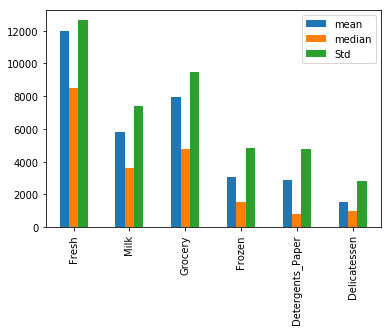

In [11]:
sum_val_df.plot.bar()

# Sampling

### I just used sample size calculator provided by survery monkey
##### Pop size: 440
##### Confidence level : 95%
##### Margin of error : 5 %
##### Sample size : 206

# Correlation and Redundancy

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

/Users/jacoblee/anaconda3/envs/ucla_summer2018/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [13]:
wholesale_Region = wholesale_data.Region.astype('category')
wholesale_Channel = wholesale_data.Channel.astype('category')
wholesale_Feature = wholesale_data.select_dtypes([int])

In [14]:
def calculate_r_2_for_feature(data, feature):
    new_data = data.drop(feature, axis=1)
    target = data[feature]
    
    X_train, \
    X_test, \
    Y_train, \
    Y_test = train_test_split(
        new_data,target,test_size=0.45
    )
    
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,Y_train)
    
    score = regressor.score(X_test,Y_test)
    return score
    

In [15]:
calculate_r_2_for_feature(wholesale_Feature,'Detergents_Paper')

0.7201165000041788

In [16]:
print('{:20} {}'.format('Delicatessen:',calculate_r_2_for_feature(wholesale_Feature,'Delicatessen')))
print('{:20} {}'.format('Detergents_Paper:',calculate_r_2_for_feature(wholesale_Feature,'Detergents_Paper')))
print('{:20} {}'.format('Fresh:',calculate_r_2_for_feature(wholesale_Feature,'Fresh')))
print('{:20} {}'.format('Frozen:',calculate_r_2_for_feature(wholesale_Feature,'Frozen')))
print('{:20} {}'.format('Grocery:',calculate_r_2_for_feature(wholesale_Feature,'Grocery')))
print('{:20} {}'.format('Milk:',calculate_r_2_for_feature(wholesale_Feature,'Milk')))

Delicatessen:        -1.8581782197588095
Detergents_Paper:    0.7589336092819245
Fresh:               -1.6733719086290177
Frozen:              -0.0746676990333146
Grocery:             0.7336856318909643
Milk:                0.4116778253028135


**This result is created randomly because of train_test_split** SO, it is good to have mean R^2 value

In [17]:
def mean_r_2_for_feature(data, feature):
    scores = []
    for _ in range(100):
        scores.append(calculate_r_2_for_feature(data, feature))
        
    scores = np.array(scores)
    return scores.mean()

In [18]:
print('{:20} {}'.format('Delicatessen:',mean_r_2_for_feature(wholesale_Feature,'Delicatessen')))
print('{:20} {}'.format('Detergents_Paper:',mean_r_2_for_feature(wholesale_Feature,'Detergents_Paper')))
print('{:20} {}'.format('Fresh:',mean_r_2_for_feature(wholesale_Feature,'Fresh')))
print('{:20} {}'.format('Frozen:',mean_r_2_for_feature(wholesale_Feature,'Frozen')))
print('{:20} {}'.format('Grocery:',mean_r_2_for_feature(wholesale_Feature,'Grocery')))
print('{:20} {}'.format('Milk:',mean_r_2_for_feature(wholesale_Feature,'Milk')))

Delicatessen:        -2.6855253463700963
Detergents_Paper:    0.676682438704211
Fresh:               -0.7406239478408644
Frozen:              -1.0929019409431049
Grocery:             0.6598282741076988
Milk:                0.13338470057904545


# Visualize Redundancy

In [19]:
wholesale_Feature_drop = wholesale_Feature.drop(columns=['Channel','Region'])

/Users/jacoblee/anaconda3/envs/ucla_summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


4.568749189376831


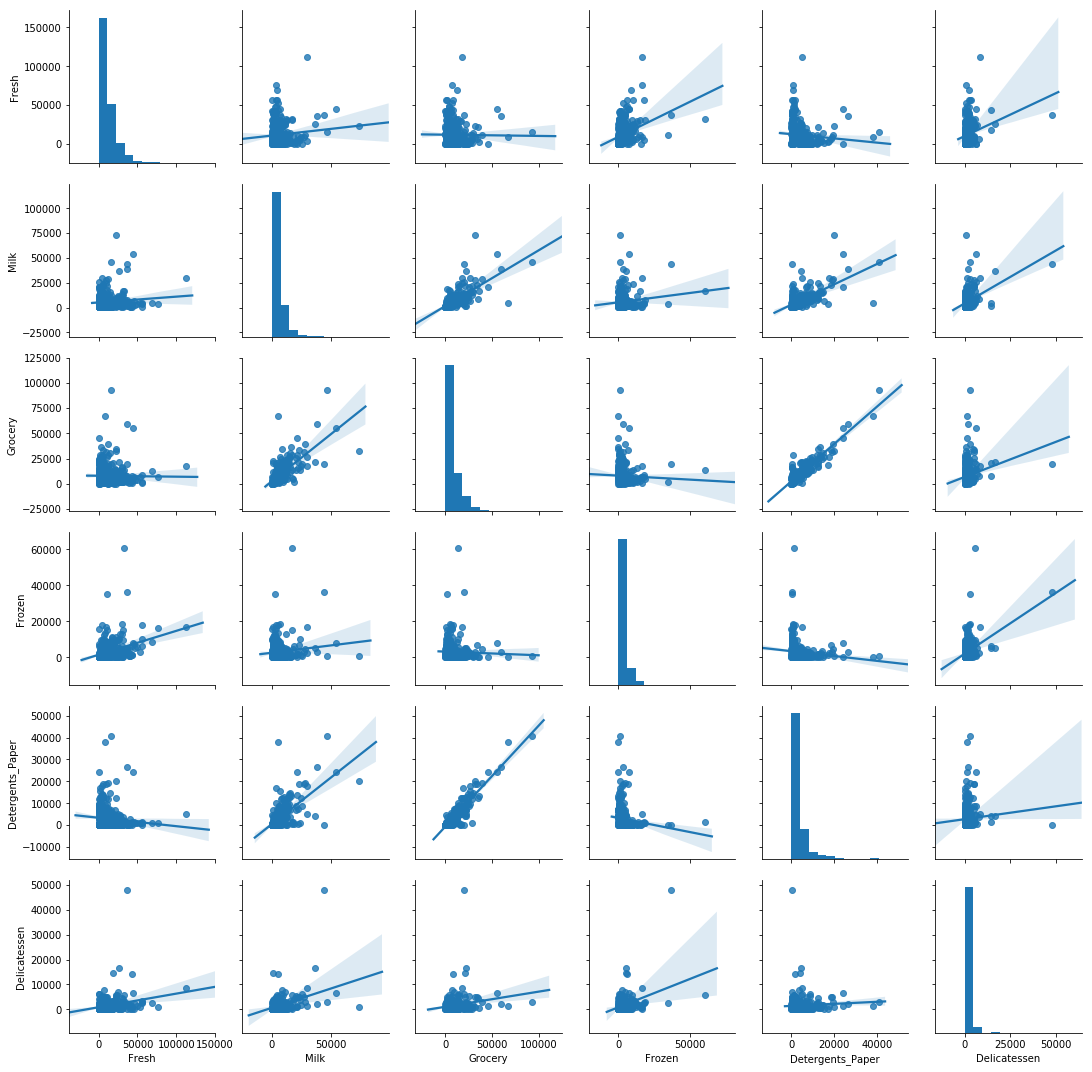

In [20]:
import time
start = time.time()
sns.pairplot(wholesale_Feature_drop , kind='reg')
print(time.time() - start)

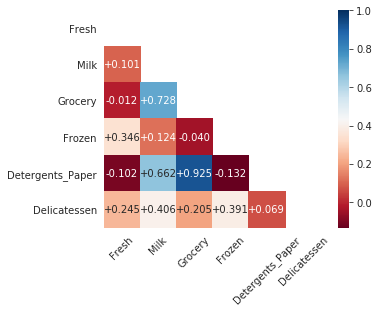

In [21]:
corr = wholesale_Feature_drop.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sample_1pct_1 = wholesale_Feature_drop.sample(206)

In [24]:
sample_stats = sample_1pct_1.describe().T
sample_stats['skew'] = st.skew(sample_1pct_1)
sample_stats['kurtosis'] = st.kurtosis(sample_1pct_1)
sample_stats

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Fresh,206.0,11759.995146,11856.742503,3.0,2623.00,8180.0,17491.25,56159.0,1.514374,2.294642
Milk,206.0,5322.616505,7099.958880,55.0,1612.75,3596.0,6525.25,73498.0,5.418391,42.809600
Grocery,206.0,7899.116505,8721.735574,3.0,2149.00,4603.0,10973.75,59598.0,2.330600,7.466496
Frozen,206.0,2781.228155,3279.618222,25.0,676.75,1555.0,3506.00,18711.0,2.167548,5.487831
Detergents_Paper,206.0,2921.912621,4488.471992,3.0,267.75,775.5,4153.00,26701.0,2.598275,7.872223
Delicatessen,206.0,1190.000000,1377.665569,3.0,323.00,898.5,1540.00,14472.0,4.894916,40.872249


In [25]:
stats = wholesale_Feature_drop.describe().T
stats['skew'] = st.skew(wholesale_Feature_drop)
stats['kurtosis'] = st.kurtosis(wholesale_Feature_drop)
stats

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583,11.392124
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922,24.376349
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187,20.664153
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826,54.056180
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458,18.780528
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534,168.747781


# Standardization - Scaling

By scaling the data, we can rescale the distribution of values so that the mean value is 0 and stadard deviation is 1. It allows me to compare those valuses under the same scales. 

In [26]:
scaler = StandardScaler()
scaler.fit(wholesale_Feature_drop)
wholesale_sc = scaler.transform(wholesale_Feature_drop)

In [27]:
wholesale_sc_df = pd.DataFrame(wholesale_sc, columns=wholesale_Feature_drop.columns)

In [28]:
sc_stats = wholesale_sc_df.describe().T
sc_stats['skew'] = st.skew(wholesale_Feature_drop)
sc_stats['kurtosis'] = st.kurtosis(wholesale_Feature_drop)
sc_stats

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Fresh,440.0,-3.431598e-17,1.001138,-0.949683,-0.702334,-0.276760,0.390523,7.927738,2.552583,11.392124
Milk,440.0,0.000000e+00,1.001138,-0.778795,-0.578306,-0.294258,0.189092,9.183650,4.039922,24.376349
Grocery,440.0,-4.037175e-17,1.001138,-0.837334,-0.610836,-0.336668,0.284911,8.936528,3.575187,20.664153
Frozen,440.0,3.633457e-17,1.001138,-0.628343,-0.480431,-0.318804,0.099464,11.919002,5.887826,54.056180
Detergents_Paper,440.0,2.422305e-17,1.001138,-0.604416,-0.551135,-0.433600,0.218482,7.967672,3.619458,18.780528
Delicatessen,440.0,-8.074349e-18,1.001138,-0.540264,-0.396401,-0.198577,0.104860,16.478447,11.113534,168.747781


/Users/jacoblee/anaconda3/envs/ucla_summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


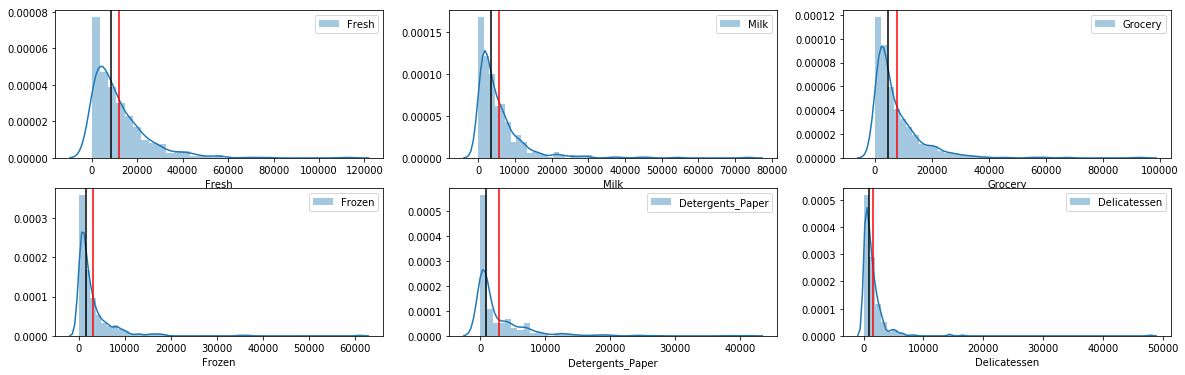

In [29]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(wholesale_Feature_drop):
    fig.add_subplot(231+i)
    sns.distplot(wholesale_Feature_drop[col], label=col)
    plt.axvline(wholesale_Feature_drop[col].mean(), c = 'red')
    plt.axvline(wholesale_Feature_drop[col].median(), c ='black')
    plt.legend()

# Deskewing

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
wholesale_log_df = np.log(1+wholesale_Feature_drop)

In [32]:
scaler.fit(wholesale_log_df)
wholesale_log_sc = scaler.transform(wholesale_log_df)
wholesale_log_sc_df = pd.DataFrame(wholesale_log_sc, columns=wholesale_Feature_drop.columns)

In [33]:
for col in wholesale_log_df.columns:
    scaled_log_col_skewtest = st.skewtest(wholesale_log_sc_df[col])
    print ('{} scaled log: {}'.format(col, scaled_log_col_skewtest))

Fresh scaled log: SkewtestResult(statistic=-10.10280950731593, pvalue=5.368180213426712e-24)
Milk scaled log: SkewtestResult(statistic=-1.9212199962370418, pvalue=0.054703978253565155)
Grocery scaled log: SkewtestResult(statistic=-5.3584220819710255, pvalue=8.39519282553495e-08)
Frozen scaled log: SkewtestResult(statistic=-2.9755954096465387, pvalue=0.0029242037232685837)
Detergents_Paper scaled log: SkewtestResult(statistic=-2.0207555302417313, pvalue=0.04330507831332517)
Delicatessen scaled log: SkewtestResult(statistic=-7.857286099606232, pvalue=3.925455518179811e-15)


/Users/jacoblee/anaconda3/envs/ucla_summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


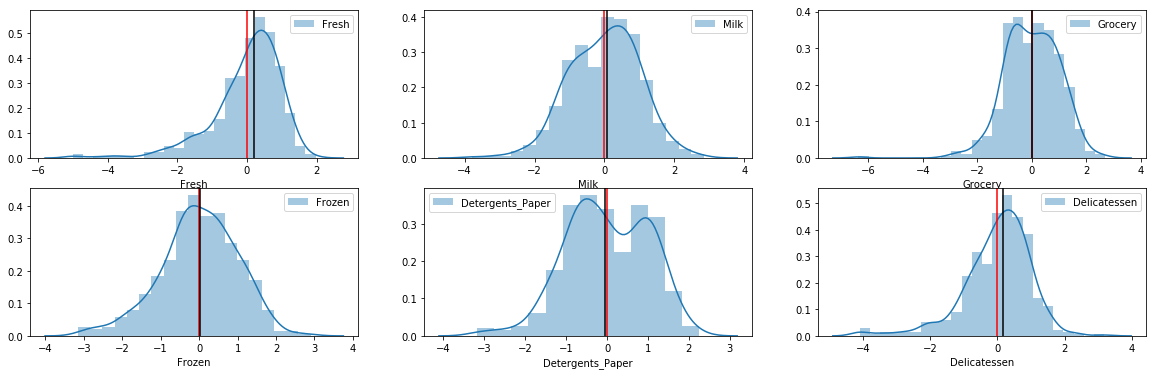

In [34]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(wholesale_log_sc_df.columns):
    fig.add_subplot(231+i)
    sns.distplot(wholesale_log_sc_df[col], label=col)
    plt.axvline(wholesale_log_sc_df[col].mean(),c='red')
    plt.axvline(wholesale_log_sc_df[col].median(),c='black')
    plt.legend()

# Remove outliers

Outliers can affect assumption, so it is better to remove

In [35]:
from collections import Counter
from sklearn.decomposition import PCA

In [36]:
%matplotlib inline

In [37]:
def feature_outliers(dataframe, col, param=1.5):
    Q1 = np.percentile(dataframe[col], 25)
    Q3 = np.percentile(dataframe[col], 75)
    turkey_window = param*(Q3-Q1)
    less_than_Q1 = dataframe[col] < Q1 - turkey_window
    
    greater_than_Q3 = dataframe[col] > Q3 + turkey_window
    turkey_mask = (less_than_Q1 | greater_than_Q3)
    return dataframe.loc[turkey_mask]

In [38]:
feature_outliers(wholesale_Feature_drop, 'Grocery')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
28,4113,20484,25957,1158,8604,5206
43,630,11095,23998,787,9529,72
47,44466,54259,55571,7782,24171,6465
49,4967,21412,28921,1798,13583,1163
56,4098,29892,26866,2616,17740,1340
61,35942,38369,59598,3254,26701,2017
65,85,20959,45828,36,24231,1423
77,12205,12697,28540,869,12034,1009
85,16117,46197,92780,1026,40827,2944
86,22925,73498,32114,987,20070,903


In [39]:
for col in wholesale_log_sc_df:
    print(col, feature_outliers(wholesale_Feature_drop, col).shape)

Fresh (20, 6)
Milk (28, 6)
Grocery (24, 6)
Frozen (43, 6)
Detergents_Paper (30, 6)
Delicatessen (27, 6)


In [40]:
def multiple_outliers(dataframe, count = 2):
    raw_outliers = []
    for col in dataframe:
        outlier_df = feature_outliers(dataframe, col)
        raw_outliers += list(outlier_df.index)
        
    outlier_count = Counter(raw_outliers)
    outliers = [k for k,v in outlier_count.items() if v >= count]
    return outliers

In [41]:
len(multiple_outliers(wholesale_Feature_drop))

41

In [42]:
len(multiple_outliers(wholesale_log_sc_df))

5

In [43]:
wholesale_log_sc_df.shape

(440, 6)

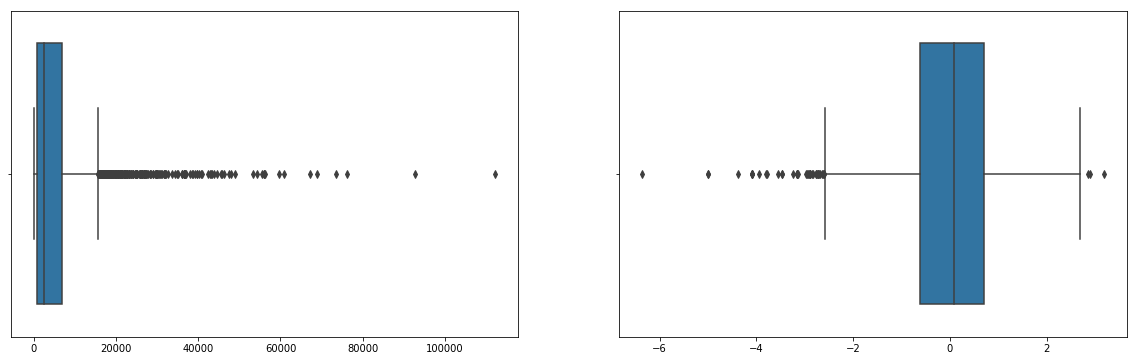

In [44]:
_, ax = plt.subplots(1,2,figsize=(20,6))

for i, df in enumerate([wholesale_Feature_drop, wholesale_log_sc_df]):
    sns.boxplot(df, ax=ax[i])

In [45]:
wholesale_log_sc_df_outliers_removed = wholesale_log_sc_df.drop(multiple_outliers(wholesale_log_sc_df))

In [46]:
wholesale_log_sc_df_outliers_removed.shape

(435, 6)

# PCA

In [47]:
from sklearn.decomposition import PCA

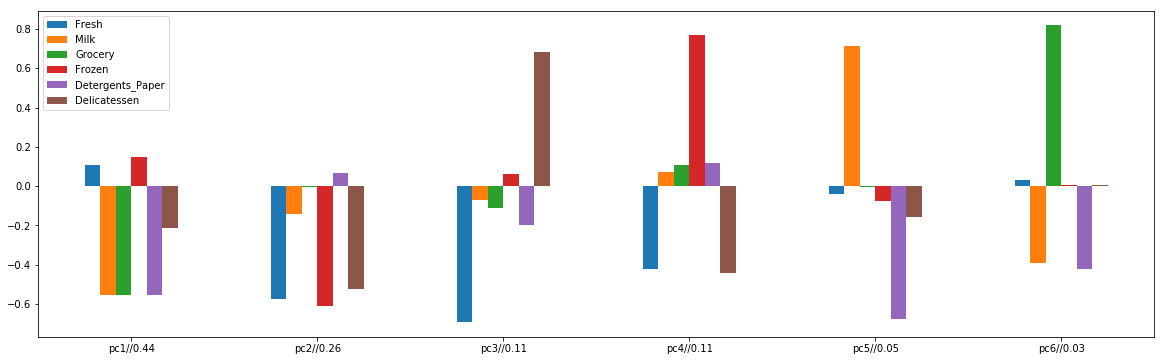

In [48]:
pca_wholesale_log_sc = PCA()
pca_wholesale_log_sc.fit(wholesale_log_sc_df_outliers_removed)

pca_loading_log_sc = \
pd.DataFrame(pca_wholesale_log_sc.components_, columns=wholesale_log_sc_df_outliers_removed.columns)

explained_variance_ratio_log_sc = pca_wholesale_log_sc.explained_variance_ratio_
pca_labels_log_sc = ['pc' + str(i+1) + '//' + str(round(ratio,2)) for i, ratio in enumerate(explained_variance_ratio_log_sc)]

ax = pca_loading_log_sc.plot(kind='bar', figsize=(20,6), rot=0)
ax.set_xticklabels(pca_labels_log_sc);

# Screen Plot
it shows how many components are good to keep.

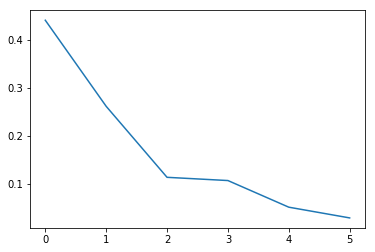

In [49]:
plt.plot(pca_wholesale_log_sc.explained_variance_ratio_)

In [50]:
pca = PCA(2)
pca.fit(wholesale_log_sc_df_outliers_removed)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [51]:
sample = wholesale_log_sc_df_outliers_removed.sample(5)

In [52]:
wholesale_pca_df = pd.DataFrame(pca.transform(wholesale_log_sc_df),
                                columns=['Dim 1','Dim 2'],
                                index=wholesale_log_sc_df.index)
sample_wholesale_pca_df = pd.DataFrame(pca.transform(sample),
                                      columns=['Dim 1','Dim 2'],
                                      index=sample.index)

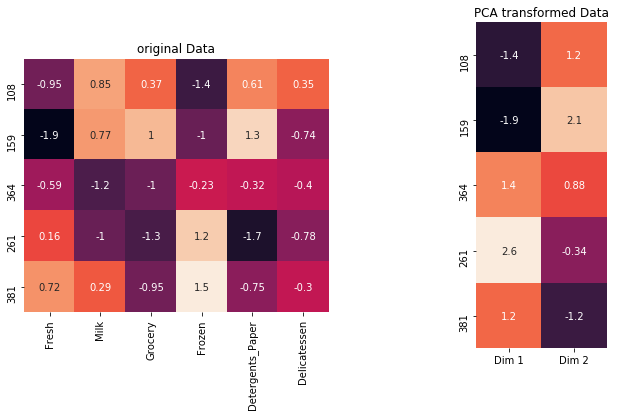

In [53]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(121)
plt.title('original Data')
sns.heatmap(sample, annot=True, cbar=False, square=True)
fig.add_subplot(122)
plt.title('PCA transformed Data')
sns.heatmap(sample_wholesale_pca_df, annot=True, cbar=False, square=True)

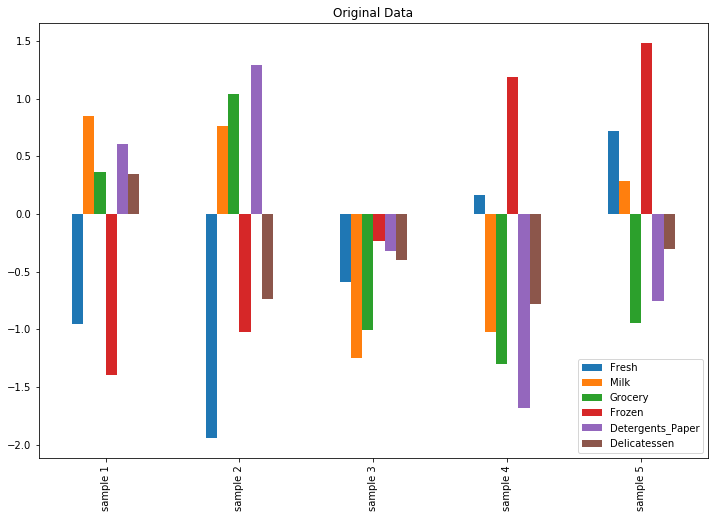

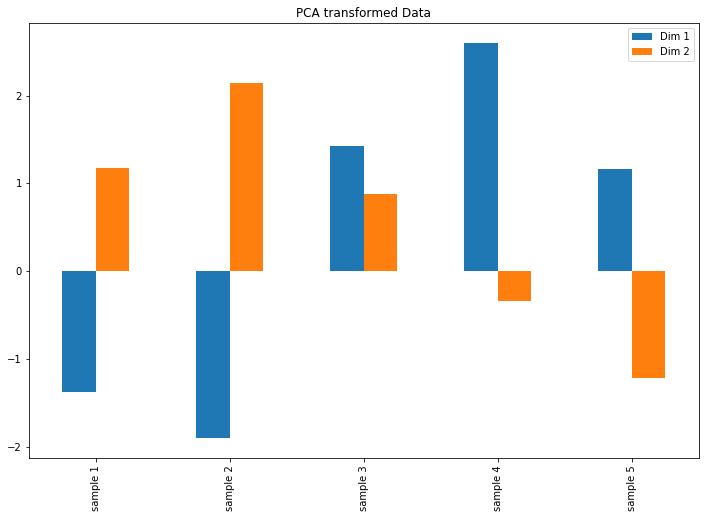

In [54]:
sample.plot(kind='bar', figsize=(12,8))
plt.title('Original Data')
_= plt.xticks(range(5),['sample 1','sample 2','sample 3','sample 4','sample 5'])

sample_wholesale_pca_df.plot(kind='bar', figsize=(12,8))
plt.title('PCA transformed Data')
_= plt.xticks(range(5),['sample 1','sample 2','sample 3','sample 4','sample 5'])

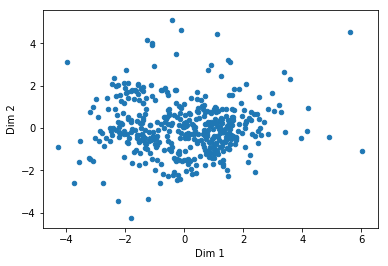

In [55]:
wholesale_pca_df.plot(x='Dim 1', y='Dim 2', kind='scatter')

# Clustering

In [56]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [57]:
cl_wholesale_channel = wholesale_pca_df
target = wholesale_data.Channel

In [58]:
two_dim_model = TSNE(n_components=2)

In [59]:
cl_wholesale_channel_2d = two_dim_model.fit_transform(cl_wholesale_channel)

In [60]:
cl_wholesale_channel.shape, cl_wholesale_channel_2d.shape

((440, 2), (440, 2))

In [61]:
cl_wholesale_channel_2d = pd.DataFrame(cl_wholesale_channel_2d)
cl_wholesale_channel_2d.columns = ['Grocery', 'Detergents_Paper']

In [62]:
def scatter_plot_by_class(ax, cl_wholesale_channel, target, feat_1='Grocery', feat_2='Detergents_Paper'):
    Channel = ['1', '2']
    colormap = ['green', 'blue']
    target = pd.Series(target)
    for i, cls in enumerate(target.unique()):
        color = colormap[i]
        mask = target == cls
        cl_wholesale_channel[mask].plot(x=feat_1, y=feat_2, label=Channel[i], kind='scatter', ax=ax, color=color)

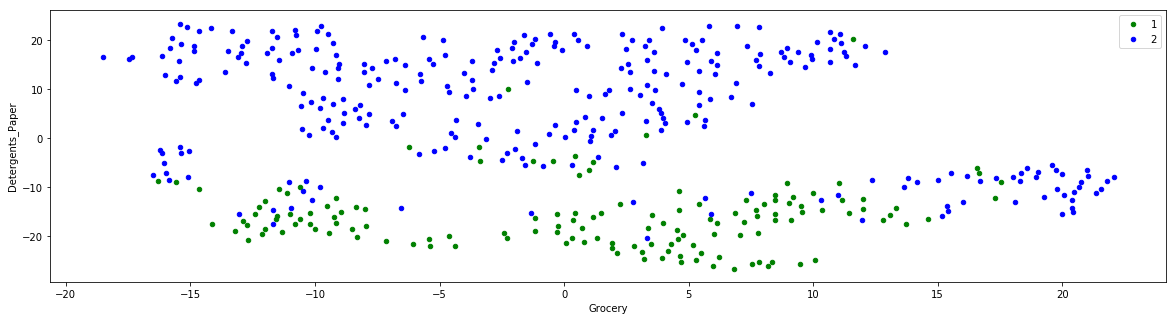

In [63]:
fix, ax = plt.subplots(1,1,figsize=(20,5))
scatter_plot_by_class(ax, cl_wholesale_channel_2d, target)

In [64]:
cluster_model = KMeans(n_clusters=2)

In [65]:
cluster_model.fit(cl_wholesale_channel)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
cl_wholesale_channel_2d_labels=cluster_model.labels_

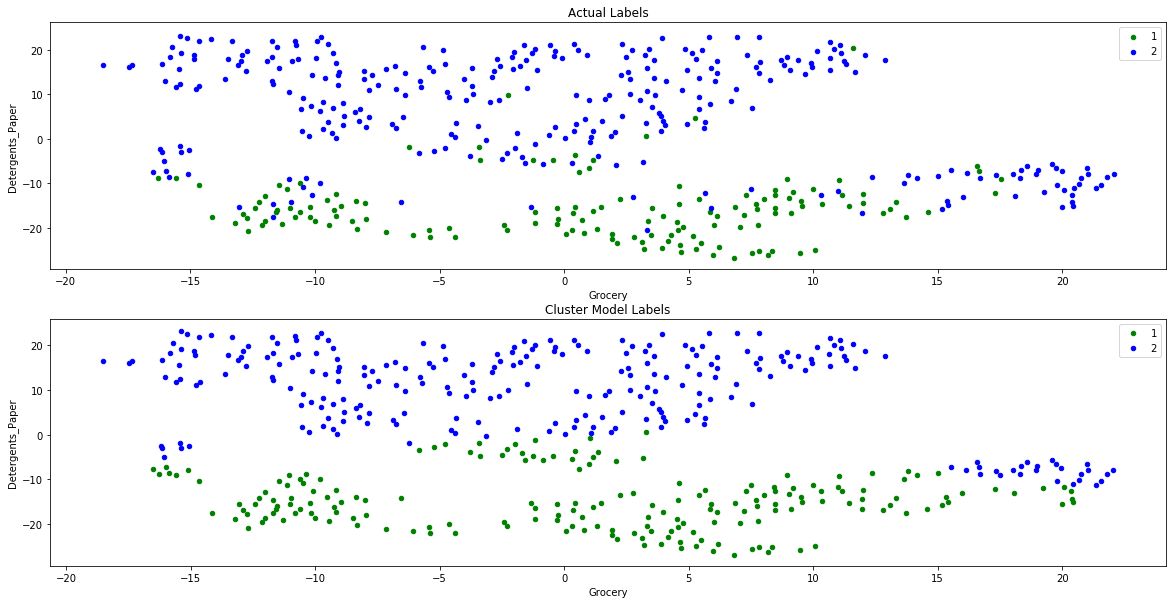

In [67]:
fig, ax = plt.subplots(2,1,figsize=(20,10))

scatter_plot_by_class(ax[0], cl_wholesale_channel_2d, target)
scatter_plot_by_class(ax[1], cl_wholesale_channel_2d, cl_wholesale_channel_2d_labels)
    
ax[0].set_title('Actual Labels')
ax[1].set_title('Cluster Model Labels');

# Conclusion

Through out the analysis, I could assum the what channels, which are customer, are on the given dataset.<br>
Correlation and Redundancy Analysis tells me that Grocery and Detergents have the strongest correlation to each others.<br> 
This means that the two channels(or customers) usually consume grocery and detergents together.<br> Based on that, it makes sense to say the channels are sort of hotel or restaurants.   